Device set to use cpu


05-10-2025 | joy (High, 0.974) | Crisis: False
06-10-2025 | sadness (High, 0.989) | Crisis: True
07-10-2025 | anger (Medium, 0.640) | Crisis: True
08-10-2025 | anger (High, 0.785) | Crisis: False
09-10-2025 | joy (High, 0.987) | Crisis: False
10-10-2025 | anger (High, 0.988) | Crisis: True
11-10-2025 | fear (High, 0.994) | Crisis: True
12-10-2025 | sadness (Medium, 0.527) | Crisis: False
13-10-2025 | sadness (Medium, 0.647) | Crisis: False


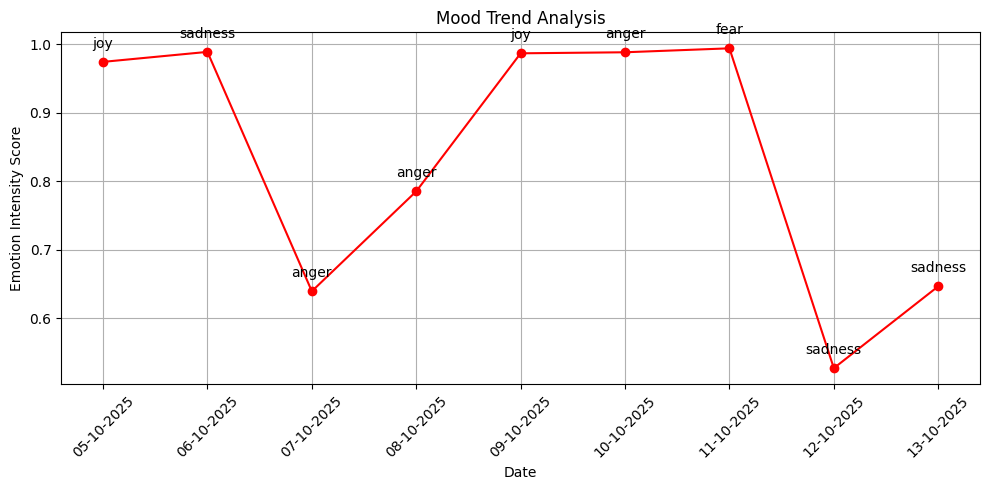

In [12]:


# Load pre-trained emotion classifier
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Sample user messages
Sample_texts = [
    "I am very happy today!",
    "I am so sad and depressed.",
    "I am going to kill Lakshya.",
    "I want to kill chicken to eat.",
    "I am excited about the new project.",
    "I am angry about the delay.",
    "I am scared of the dark.",
    "I don't know what to do anymore.",
    "This is frustrating and exhausting."
]

# Generalized crisis detection function
def is_crisis(text, emotion_label, intensity_score):
    negative_emotions = ["sadness", "anger", "fear"]
    crisis_keywords = ["kill", "suicide", "end it", "hopeless", "hurt", "die", "destroy", "murder"]

    # Generalized safe contexts
    safe_objects = [
        "chicken", "mosquito", "insect", "weeds", "engine", "bacteria", "germs", "time", "app", "process"
    ]
    safe_phrases = [
        "kill to eat", "kill for dinner", "kill switch", "kill the lights", "kill the engine"
    ]

    text_lower = text.lower()

    # Skip crisis flag if safe object follows "kill"
    for obj in safe_objects:
        if f"kill {obj}" in text_lower:
            return False

    # Skip crisis flag if safe phrase is present
    for phrase in safe_phrases:
        if phrase in text_lower:
            return False

    # Crisis if keyword is present OR emotion is negative and intense
    keyword_trigger = any(word in text_lower for word in crisis_keywords)
    if keyword_trigger:
        return True
    if emotion_label in negative_emotions and intensity_score > 0.75:
        return True
    return False

# Analyze messages
emotion_log = []
for i, msg in enumerate(Sample_texts):
    result = classifier(msg)[0]
    top_emotion = max(result, key=lambda x: x['score'])
    timestamp = datetime.now() - timedelta(days=len(Sample_texts) - i)

    # Emotion intensity detection
    intensity_score = top_emotion['score']
    if intensity_score > 0.75:
        intensity = 'High'
    elif intensity_score > 0.3:
        intensity = 'Medium'
    else:
        intensity = 'Low'

    # Crisis flag detection
    crisis_flag = is_crisis(msg, top_emotion['label'], intensity_score)

    # Store results
    emotion_log.append({
        "timestamp": timestamp,
        "text": msg,
        "emotion": top_emotion['label'],
        "intensity": intensity,
        "score": intensity_score,
        "crisis": crisis_flag
    })

# Print results
for entry in emotion_log:
    print(f"{entry['timestamp'].strftime('%d-%m-%Y')} | {entry['emotion']} ({entry['intensity']}, {entry['score']:.3f}) | Crisis: {entry['crisis']}")

# Mood trend analysis plot
dates = [e['timestamp'].strftime('%d-%m-%Y') for e in emotion_log]
emotions = [e['emotion'] for e in emotion_log]
scores = [e["score"] for e in emotion_log]

plt.figure(figsize=(10, 5))
plt.plot(dates, scores, marker='o', linestyle='-', color='red')
for i, txt in enumerate(emotions):
    plt.annotate(txt, (dates[i], scores[i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.title("Mood Trend Analysis")
plt.xlabel("Date")
plt.ylabel("Emotion Intensity Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()